# **Retail Stock Market Behavior — Data Preprocessing and Initial Exploration**

In [1]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("meesalasreesainath/online-retail")

print("Path to dataset files:", path)

Path to dataset files: /Users/sainathmeesala/.cache/kagglehub/datasets/meesalasreesainath/online-retail/versions/1


# **Read the Data**

    This dataset contains transaction records from a UK-based online retail store, covering the period between **December 1, 2010** and **December 9, 2011**.
      **Source:** [UCI Machine Learning Repository – Online Retail Dataset](http://archive.ics.uci.edu/ml/datasets/Online+Retail)


In [2]:
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_path = os.path.join(path, file)
        break

# Load the dataset
df = pd.read_csv(csv_path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# **Basic exploration and data preprocessing**

Let's have a look how does the data looks like:

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


## **Number of rows and columns in data set**

In [5]:
print("Number of rows in dataset is: ", df.shape[0])
print("Number of columns in dataset is: ", df.shape[1])

Number of rows in dataset is:  541909
Number of columns in dataset is:  8


## **Basic Information and Missing Values**

Before cleaning, it's important to explore column datatypes and identify missing values.
This step helps us decide which attributes require conversion or imputation.

In [6]:
df.info()
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

Missing values per column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
print("Number of unique customers IDs:", len(df['CustomerID'].unique().tolist()))

Number of unique customers IDs: 4373


# **Remove Duplicate Records**

Duplicate records lead to inflated counts and incorrect metrics.
We remove them and track the exact number dropped to maintain transparency.

In [8]:
initial = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Duplicates removed: {initial - df.shape[0]}")
print("Shape after cleaning:", df.shape)


Duplicates removed: 5268
Shape after cleaning: (536641, 8)


# **Handle Missing Customer IDs**

The CustomerID field is crucial for segmentation and behavioral analysis.
Records missing this field are removed, while others are retained.

In [9]:
before = df.shape[0]
df.dropna(subset=["CustomerID"], inplace=True)
print(f"Removed rows with missing CustomerID: {before - df.shape[0]}")
print("Shape after:", df.shape)


Removed rows with missing CustomerID: 135037
Shape after: (401604, 8)


# **Clean Invalid Quantity or Unit Price**

Transactions with negative or zero values for quantity or unit price are logically invalid.
These are filtered out to ensure analytical consistency.

In [10]:
before = df.shape[0]
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
print(f"Removed invalid Quantity/Price rows: {before - df.shape[0]}")


Removed invalid Quantity/Price rows: 8912


# **Convert Data Types**

Converting data types ensures accurate computation.
Dates are converted to datetime, and CustomerID to integer for efficient processing.

In [11]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")
df["CustomerID"] = df["CustomerID"].astype(int)


In [12]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


# **Create New Analytical Features**

We add engineered columns to enrich the dataset.
These include total transaction value and time components, essential for temporal and revenue analysis.

In [13]:
df["TotalPrice"] = round(df["Quantity"] * df["UnitPrice"],3)
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()
df["Hour"] = df["InvoiceDate"].dt.hour
print("New features added successfully.")


New features added successfully.


In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,8


# **Remove Cancelled Invoices**

Invoices beginning with “C” represent cancelled transactions.
We exclude them to prevent double-counting and revenue misrepresentation.

In [15]:
before = df.shape[0]
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]
print(f"Removed cancelled invoices: {before - df.shape[0]}")


Removed cancelled invoices: 0


# **Handle Outliers Using IQR Method**

Outliers can distort mean and variance.
Using the Interquartile Range (IQR), we identify and remove extreme Quantity and UnitPrice values.

In [16]:
Q1 = df[['Quantity', 'UnitPrice']].quantile(0.25)
Q3 = df[['Quantity', 'UnitPrice']].quantile(0.75)
IQR = Q3 - Q1

before = df.shape[0]
df = df[~(
    (df['Quantity'] < (Q1['Quantity'] - 1.5 * IQR['Quantity'])) |
    (df['Quantity'] > (Q3['Quantity'] + 1.5 * IQR['Quantity'])) |
    (df['UnitPrice'] < (Q1['UnitPrice'] - 1.5 * IQR['UnitPrice'])) |
    (df['UnitPrice'] > (Q3['UnitPrice'] + 1.5 * IQR['UnitPrice']))
)]
print(f"Outliers removed: {before - df.shape[0]}")


Outliers removed: 59458


In [17]:
df.shape

(333234, 13)

# **Standardize Country Names**

Country names are normalized to a consistent title case format to prevent grouping mismatches.

In [18]:
df["Country"] = df["Country"].str.strip().str.title()
print("Unique countries:", df["Country"].nunique())


Unique countries: 37


# **Visualize Key Data Distributions**

Understanding distributions ensures numerical soundness and identifies hidden skewness.

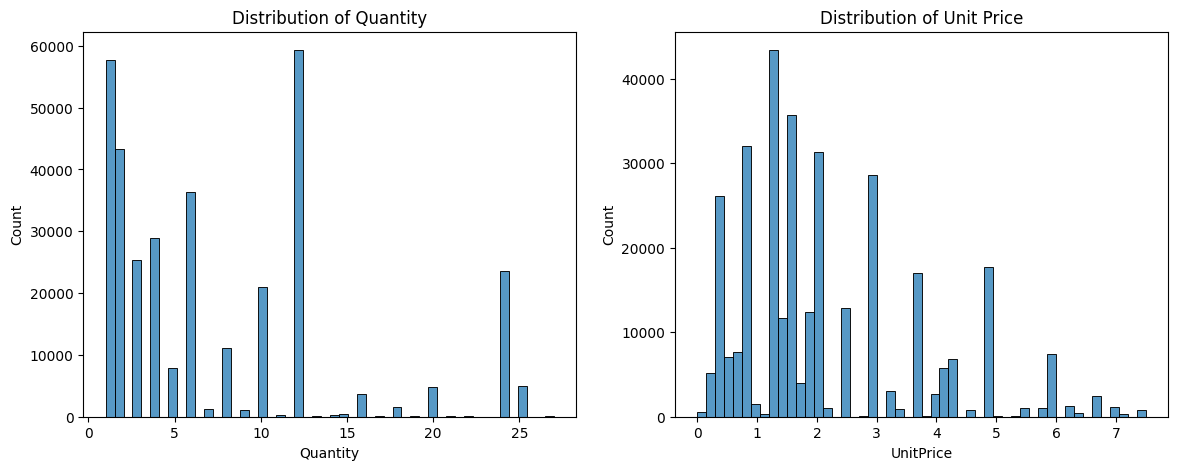

In [19]:
# Quantity and Unit Price Distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df["Quantity"], bins=50, ax=ax[0])
ax[0].set_title("Distribution of Quantity")

sns.histplot(df["UnitPrice"], bins=50, ax=ax[1])
ax[1].set_title("Distribution of Unit Price")
plt.show()


**Correlation Heatmap**

A correlation heatmap helps identify relationships among numerical features — useful for later modeling.

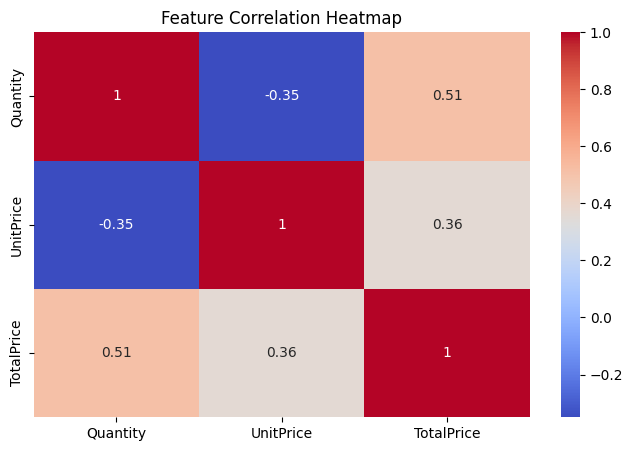

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(df[["Quantity", "UnitPrice", "TotalPrice"]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


**Top 10 Countries by Transactions**

A high-level look at which countries contribute most to transactions.

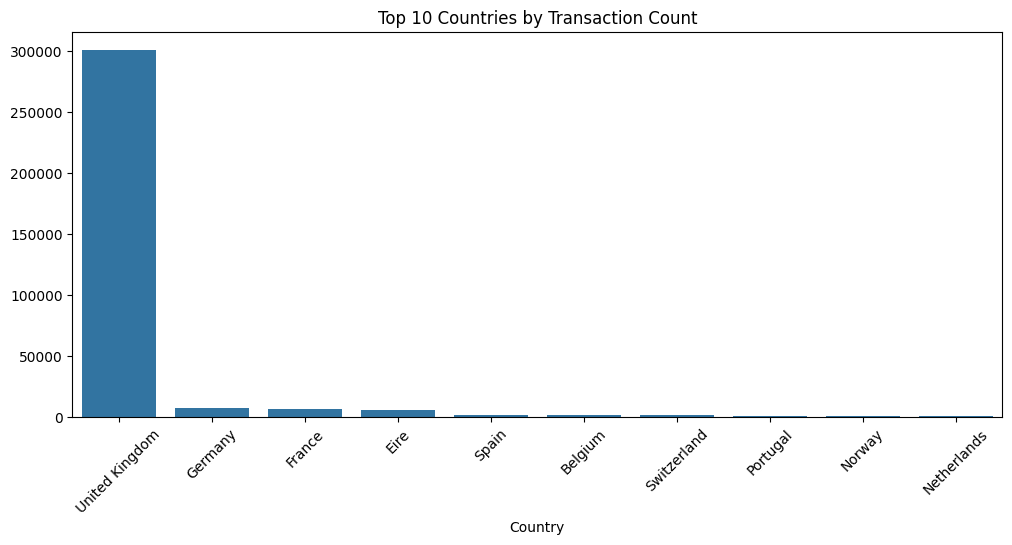

In [21]:
plt.figure(figsize=(12,5))
sns.barplot(x=df["Country"].value_counts().head(10).index,
            y=df["Country"].value_counts().head(10).values)
plt.title("Top 10 Countries by Transaction Count")
plt.xticks(rotation=45)
plt.show()


**Top 5 Best-Selling Products**

Shows which items are most frequently sold, helping understand demand concentration.

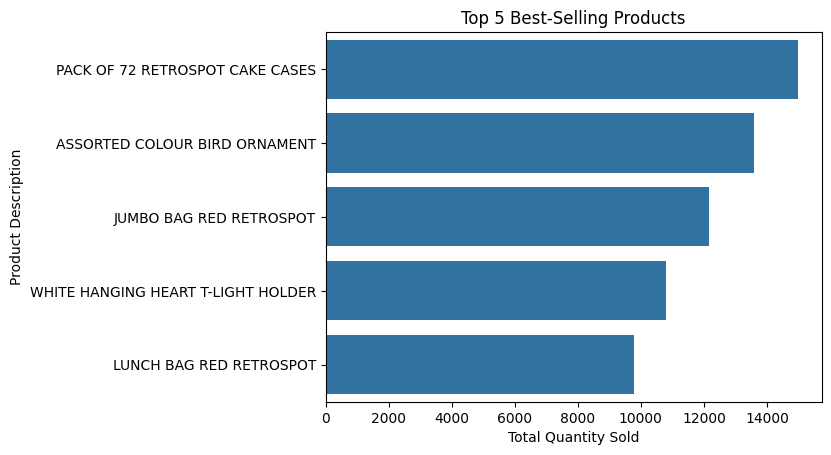

In [22]:
top_products = df.groupby("Description")["Quantity"].sum().nlargest(5)
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 5 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.show()


**Top 5 Highest Revenue Products**

Highlights which items generate the most sales revenue.

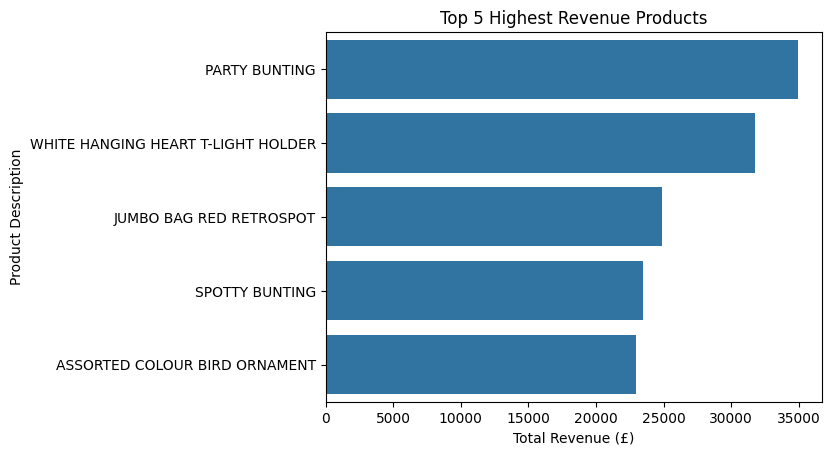

In [23]:
top_revenue = df.groupby("Description")["TotalPrice"].sum().nlargest(5)
sns.barplot(y=top_revenue.index, x=top_revenue.values)
plt.title("Top 5 Highest Revenue Products")
plt.xlabel("Total Revenue (£)")
plt.ylabel("Product Description")
plt.show()


**Top 5 Countries by Revenue**

Visualizing the top revenue-generating countries highlights core markets.

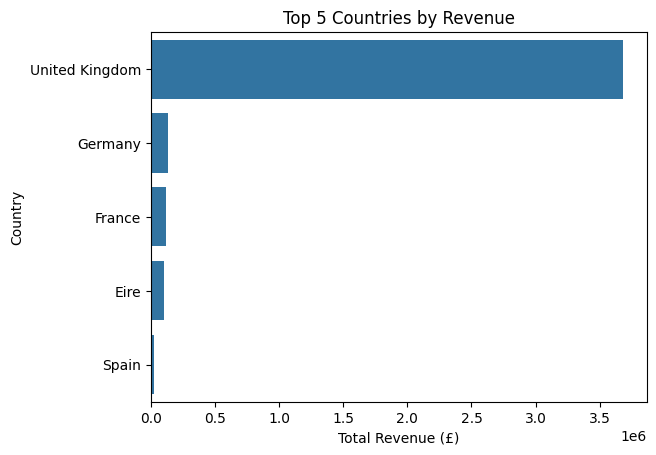

In [24]:
top_countries = df.groupby("Country")["TotalPrice"].sum().nlargest(5)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Top 5 Countries by Revenue")
plt.xlabel("Total Revenue (£)")
plt.ylabel("Country")
plt.show()


**Top 5 Customers by Spend**

Identifying top-spending customers offers early insights for loyalty analysis.

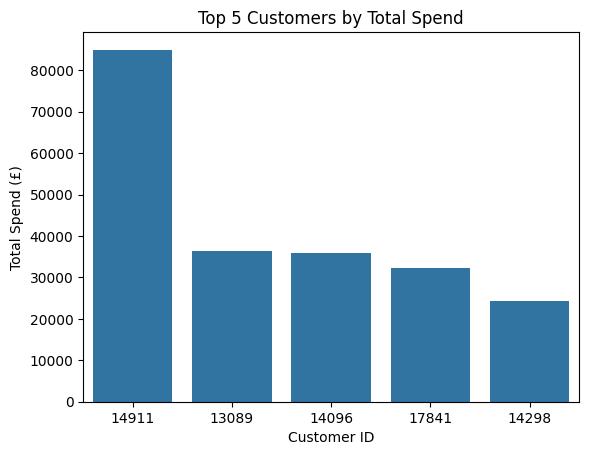

In [25]:
top_customers = df.groupby("CustomerID")["TotalPrice"].sum().nlargest(5)
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values)
plt.title("Top 5 Customers by Total Spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend (£)")
plt.show()


**Monthly Sales Trend**

Shows total revenue trends over months — useful for seasonality detection.

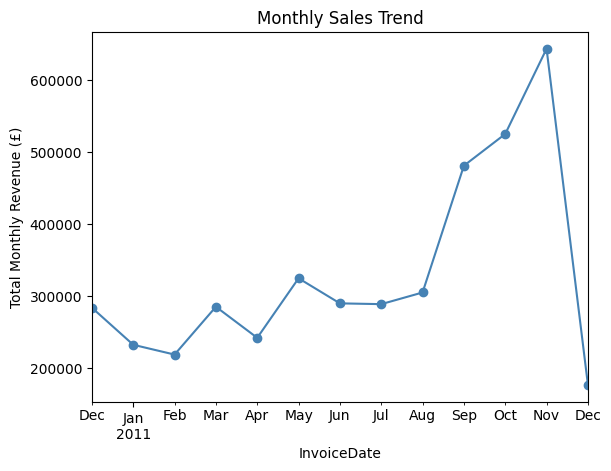

In [26]:
monthly_sales = df.groupby(df["InvoiceDate"].dt.to_period("M"))["TotalPrice"].sum()
monthly_sales.plot(kind="line", marker="o", title="Monthly Sales Trend", color="steelblue")
plt.ylabel("Total Monthly Revenue (£)")
plt.show()


**Hourly Purchase Pattern**

Shows when customers are most active during the day.

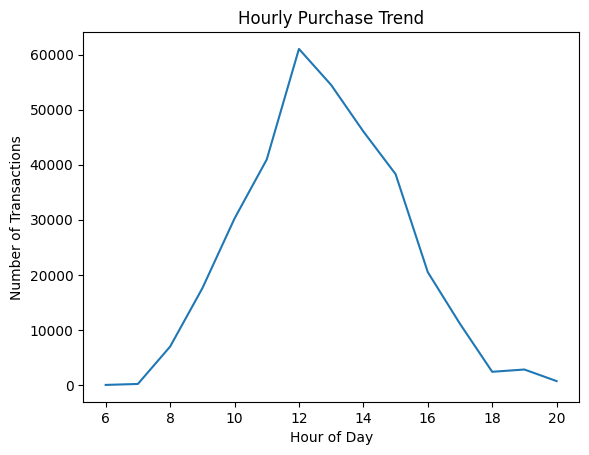

In [27]:
sns.lineplot(x=df["Hour"].value_counts().sort_index().index,
             y=df["Hour"].value_counts().sort_index().values)
plt.title("Hourly Purchase Trend")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.show()


**Day-of-Week Sales Distribution**

Indicates the busiest shopping days.

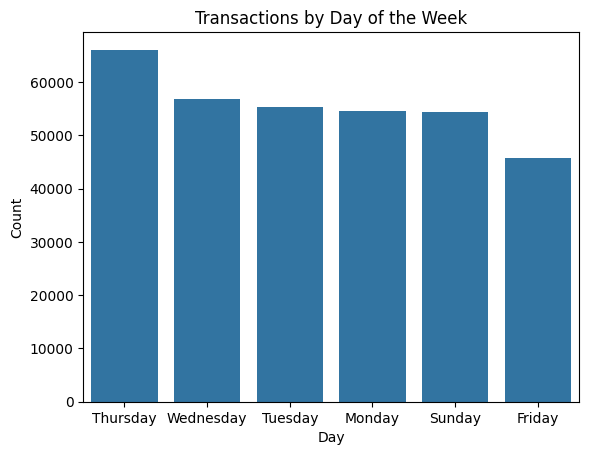

In [28]:
sns.barplot(x=df["DayOfWeek"].value_counts().index,
            y=df["DayOfWeek"].value_counts().values)
plt.title("Transactions by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()


**Average Basket Size per Country**

Compares the average transaction value across countries — excellent for market insights.

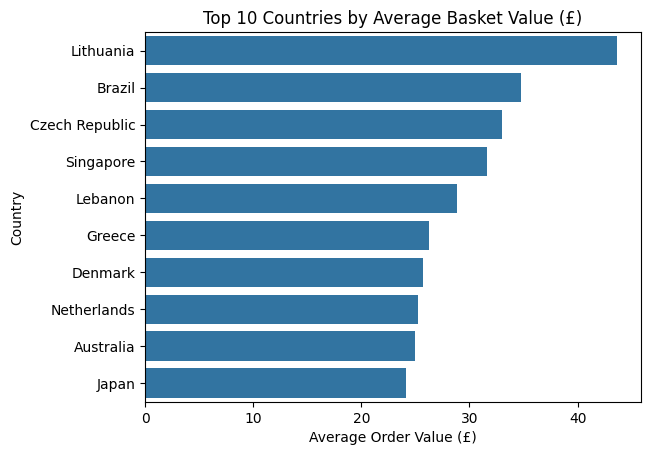

In [29]:
basket = df.groupby("Country")["TotalPrice"].mean().nlargest(10)
sns.barplot(y=basket.index, x=basket.values)
plt.title("Top 10 Countries by Average Basket Value (£)")
plt.xlabel("Average Order Value (£)")
plt.ylabel("Country")
plt.show()


**Export Cleaned Dataset**

The cleaned and preprocessed dataset is saved for downstream modeling and analysis.

In [30]:
df.to_csv("cleaned_online_retail.csv", index=False)
print("Cleaned dataset saved as cleaned_online_retail.csv")


Cleaned dataset saved as cleaned_online_retail.csv


# **Final Summary Statistics**

A final overview of dataset scope and key metrics after cleaning.

In [31]:
print("Final Dataset Summary:")
print(f"Total Rows: {df.shape[0]:,}")
print(f"Unique Customers: {df['CustomerID'].nunique():,}")
print(f"Unique Products: {df['Description'].nunique():,}")
print(f"Countries Covered: {df['Country'].nunique():,}")
print(f"Total Revenue: £{df['TotalPrice'].sum():,.2f}")


Final Dataset Summary:
Total Rows: 333,234
Unique Customers: 4,191
Unique Products: 3,575
Countries Covered: 37
Total Revenue: £4,299,476.18
